# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
482 5  23   1  10  13077      0  22625  DEFEAT
    6  26   1  15  11238   1773      0  DEFEAT
    7  25   4  15  15768   1460      0  DEFEAT
    8  22  20   8   6645  15713     51  DEFEAT
    9   7  16  10   3643  10970    739  DEFEAT

[4830 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4830 entries, (0, 0) to (482, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4830 non-null   int64 
 1   A       4830 non-null   int64 
 2   D       4830 non-null   int64 
 3   DMG     4830 non-null   int64 
 4   H       4830 non-null   int64 
 5   MIT     4830 non-null   int64 
 6   GAME    4830 non-null   object
dtypes: int64(6), object(1)
memory usage: 298.6+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4830.000000,4830.000000,4830.000000,4830.00000,4830.000000,4830.000000
mean,13.685093,7.215528,6.386542,6186.56853,3828.269565,2383.282609
std,9.543896,8.119227,3.845627,4295.90440,5044.437168,4627.939834
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2738.50000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5513.50000,748.000000,365.000000
75%,20.000000,11.000000,9.000000,9068.50000,7401.000000,1998.000000
max,58.000000,54.000000,21.000000,26666.00000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0   7   3   6   5933   1068   6199  DEFEAT
    1   7   0  10   3601    747      0  DEFEAT
    2   9   1   6   4352      0      0  DEFEAT
    3   7   7   2   2332   6325      0  DEFEAT
    4   6   4   2   3410   5979    606  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
482 5  23   1  10  13077      0  22625  DEFEAT
    6  26   1  15  11238   1773      0  DEFEAT
    7  25   4  15  15768   1460      0  DEFEAT
    8  22  20   8   6645  15713     51  DEFEAT
    9   7  16  10   3643  10970    739  DEFEAT

[4830 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,17.653209,4.250518,6.121118,9014.497930,351.199793,9672.075569
std,10.170914,3.702313,3.691305,4116.183844,1073.902357,6071.361701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,3.000000,6019.750000,0.000000,5444.500000
50%,17.000000,3.000000,6.000000,8844.500000,0.000000,8531.000000
75%,24.000000,6.000000,8.000000,11599.000000,0.000000,12893.250000
max,58.000000,24.000000,21.000000,24682.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,16.989130,1.866977,7.030538,8192.036749,344.749482,636.012940
std,9.178329,2.579328,4.077143,3674.903367,553.469582,1117.117817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.750000,0.000000,4.000000,5533.000000,0.000000,0.000000
50%,16.000000,1.000000,7.000000,7822.500000,1.500000,77.500000
75%,23.000000,3.000000,10.000000,10506.750000,520.000000,819.750000
max,52.000000,18.000000,21.000000,26666.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000,1932.000000
mean,8.396998,14.046584,5.875259,2767.135611,9050.324534,486.155797
std,6.713355,8.464377,3.583215,2110.943989,4156.880463,812.149723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,3.000000,1227.750000,6080.250000,0.000000
50%,7.000000,13.000000,6.000000,2438.500000,8632.500000,196.000000
75%,12.000000,19.000000,8.000000,3806.000000,11514.250000,616.250000
max,52.000000,54.000000,21.000000,16254.000000,27756.000000,7778.000000


그림 저장:tank_hist


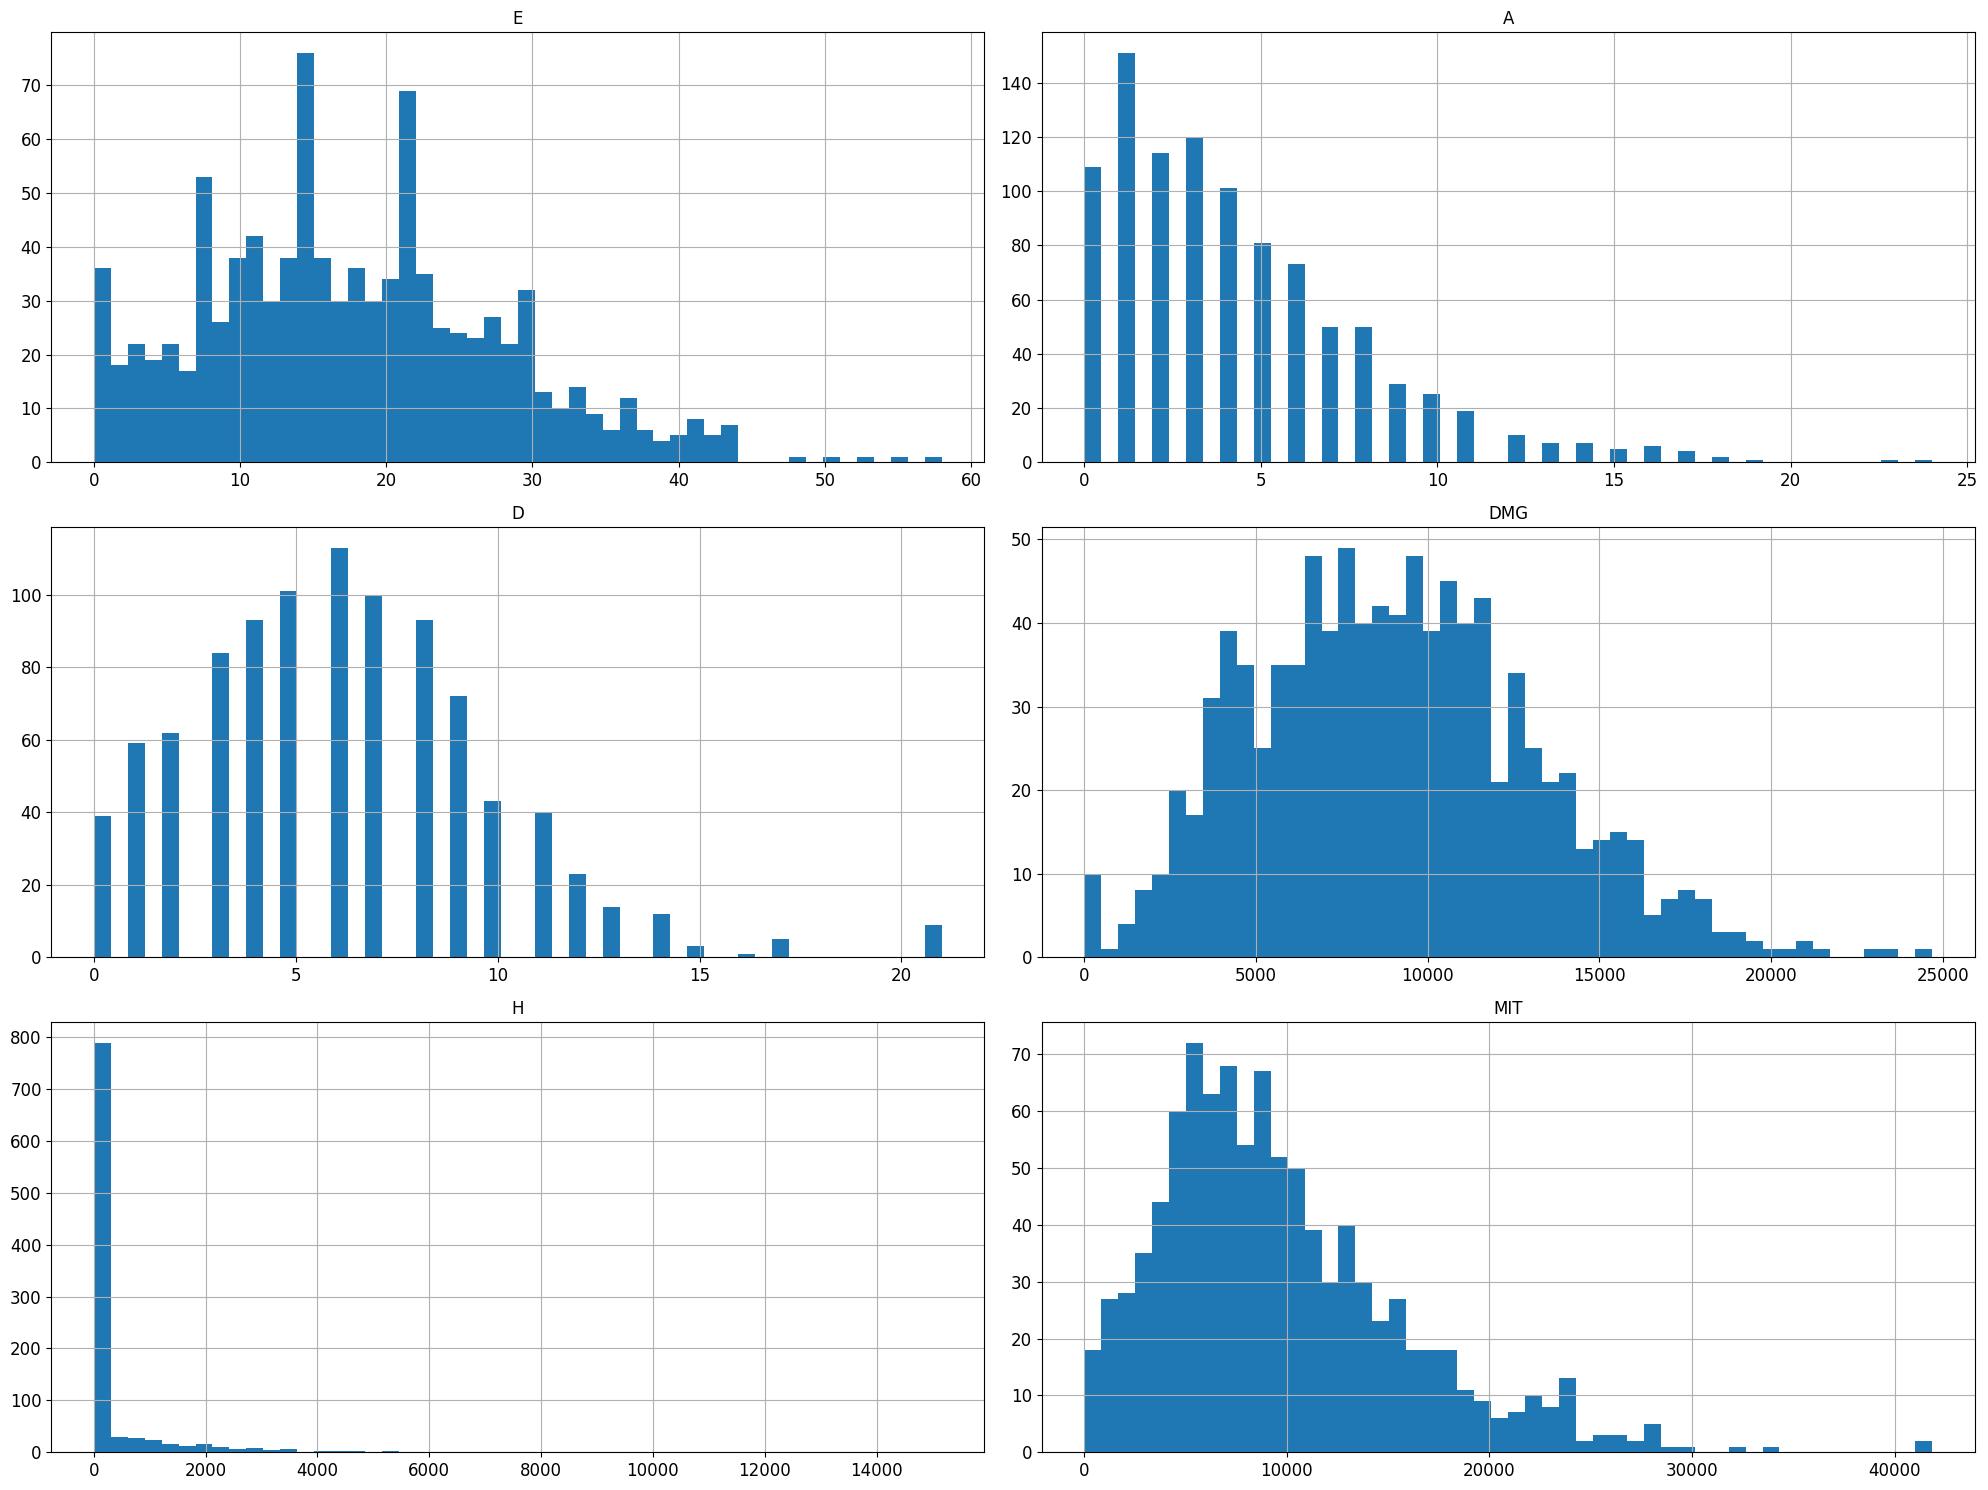

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


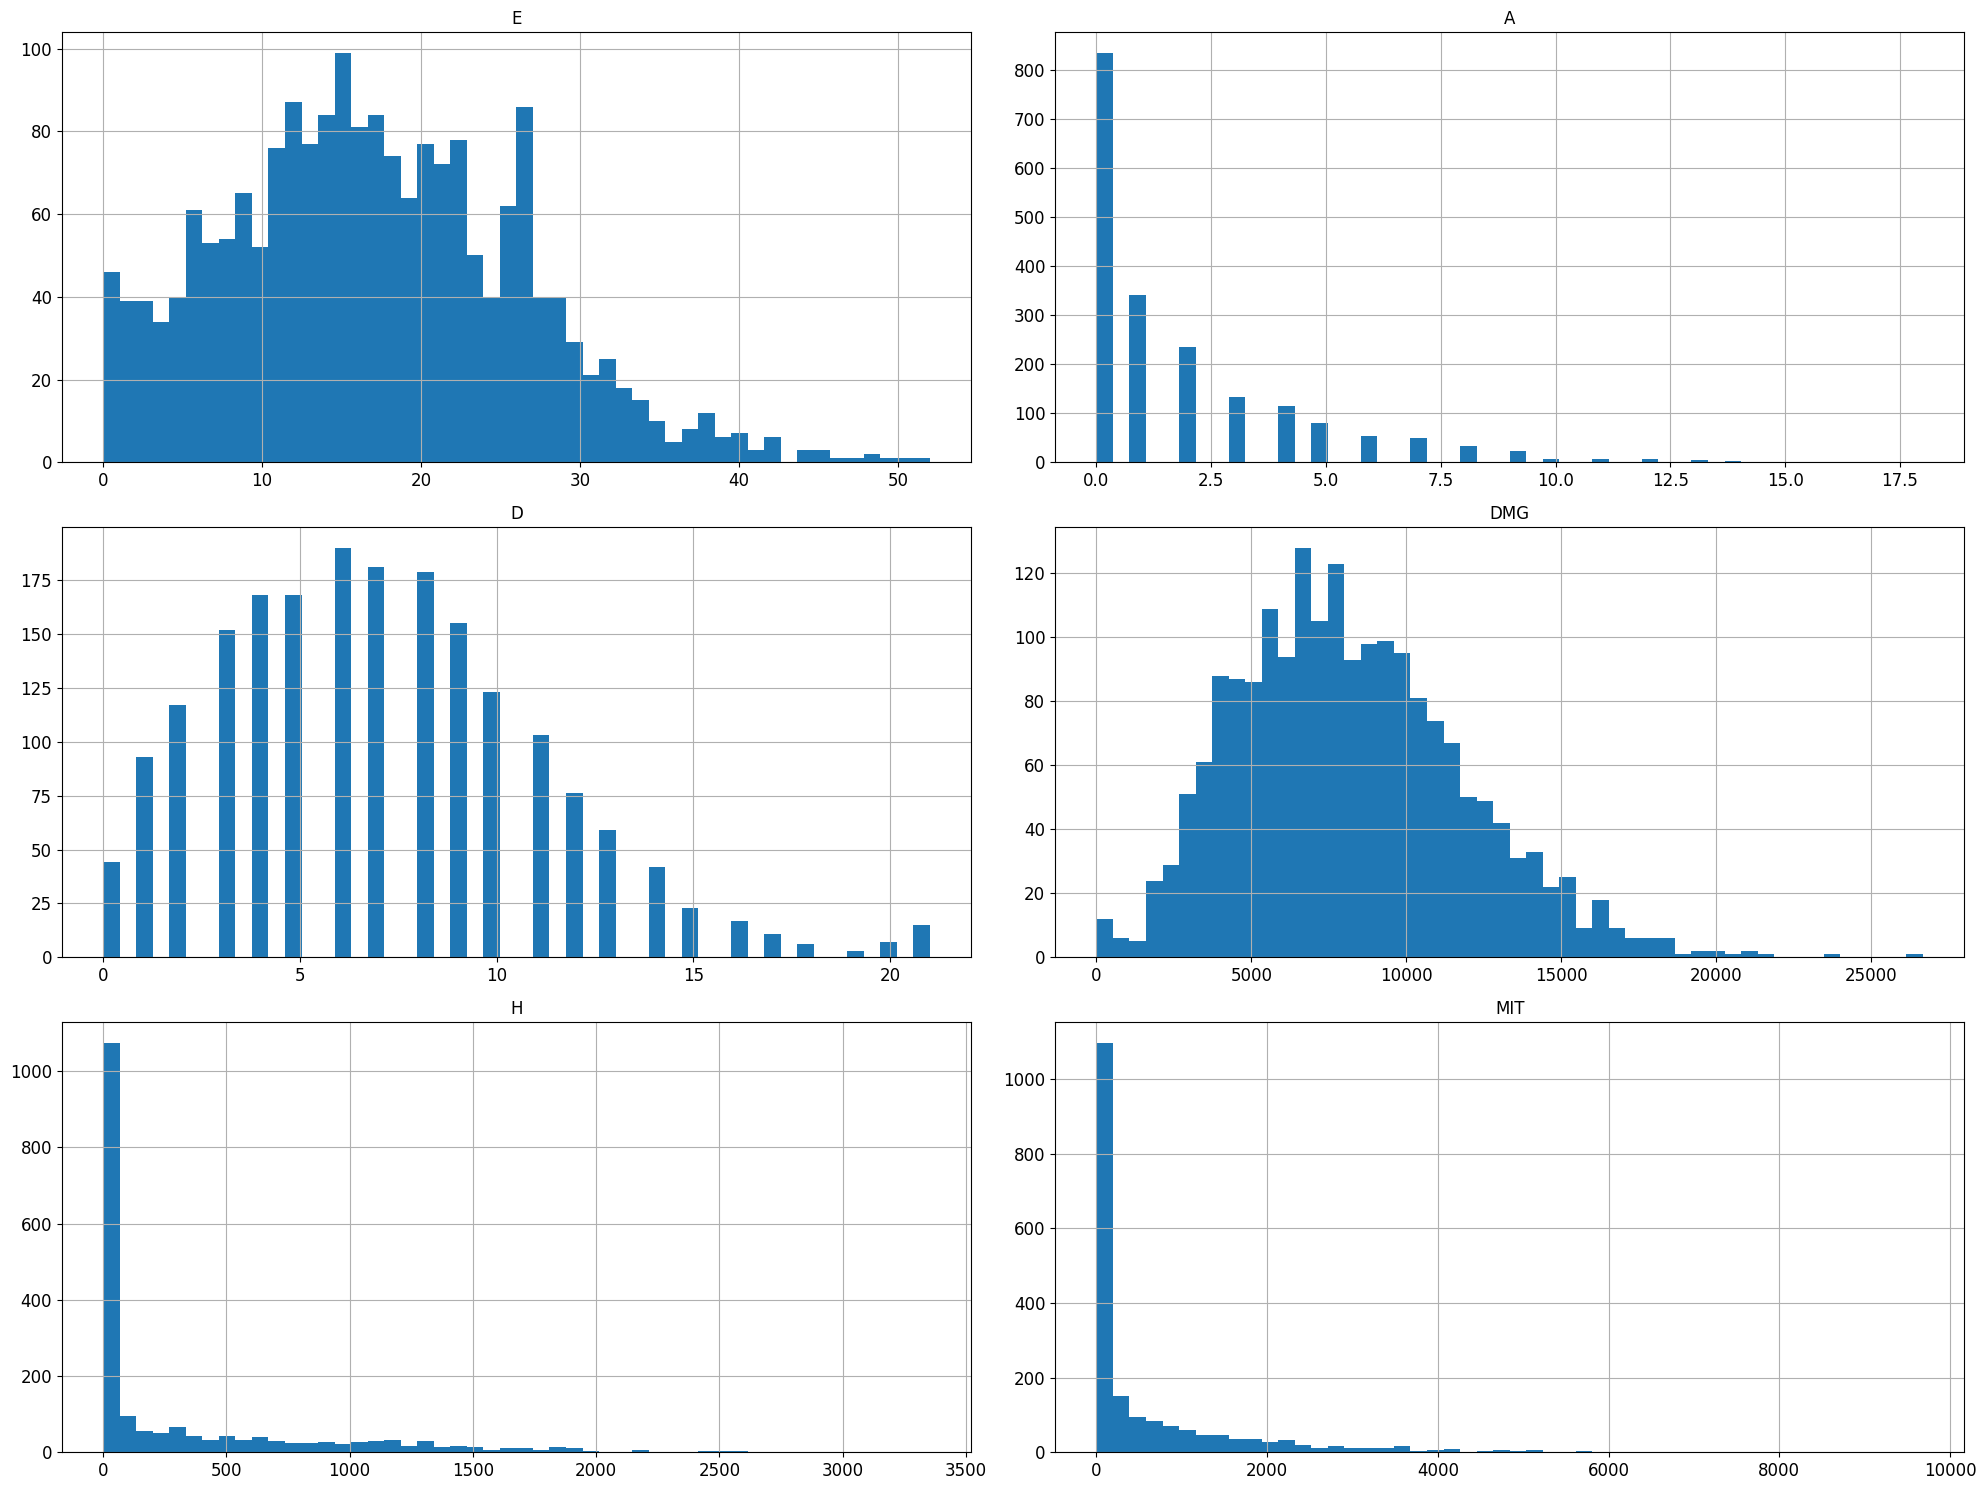

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


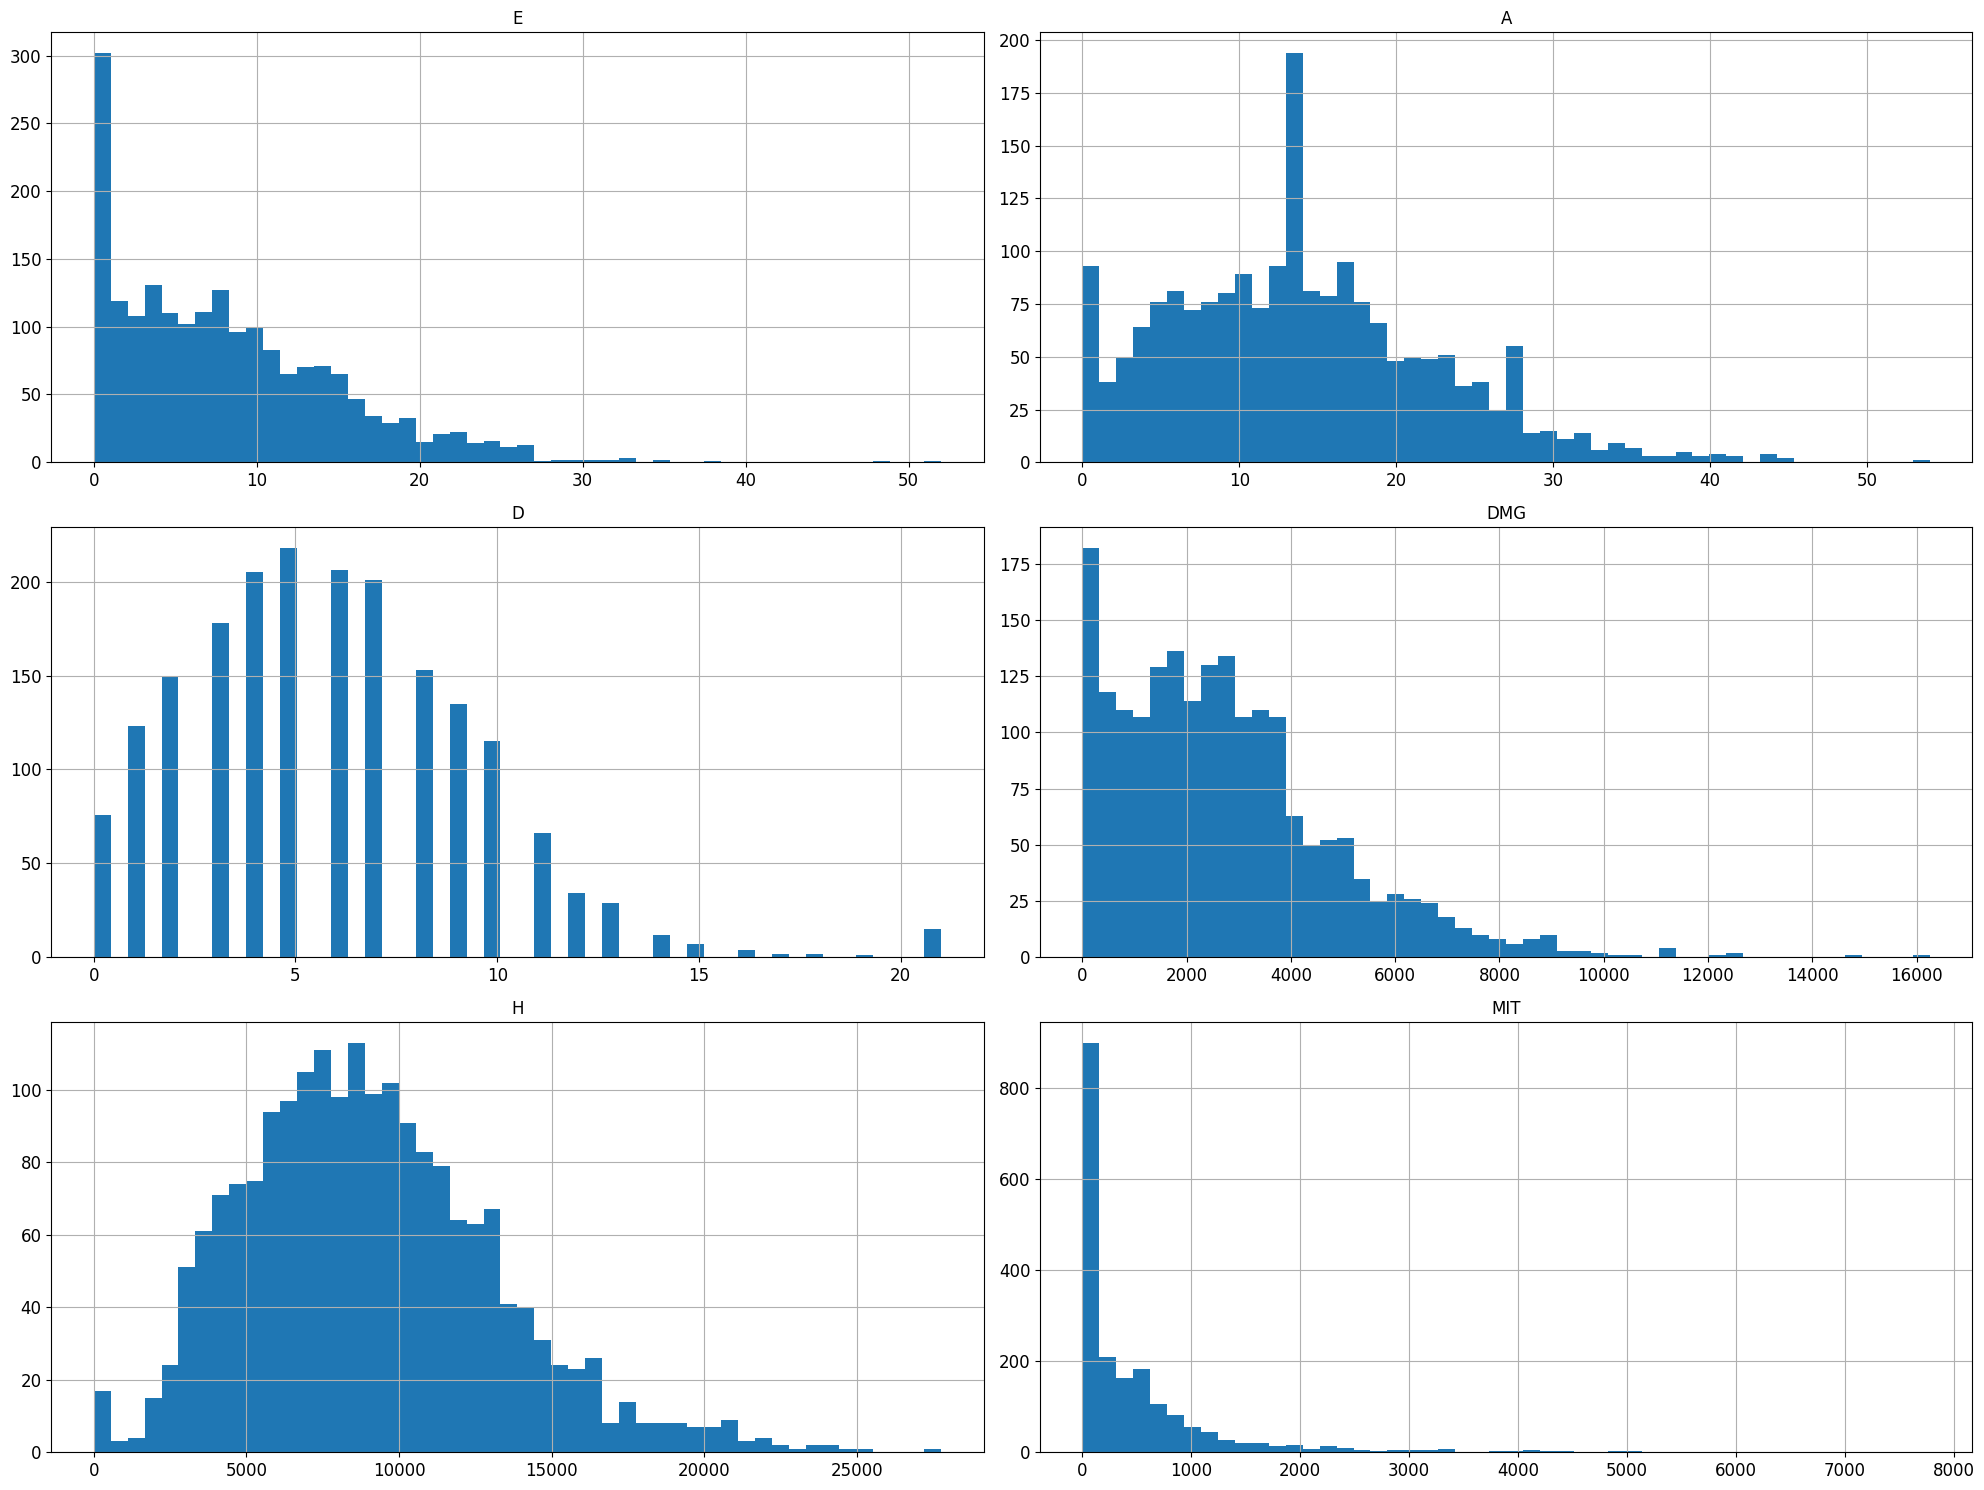

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
376 0  25   8  12  15135      0  11999  VICTORY
    1  28   0   4  11363      0   1880  VICTORY
    2  30   9  17  17566   1491   8306  VICTORY
    3  27  15   8  14848  20117    877  VICTORY
    4   4  26  10   1094  16350    228  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
84  5  14   3   6   6527      0   9164  VICTORY
    6  17   7   4   8796    324      0  VICTORY
    7  23   0   3   7139      0      0  VICTORY
    8  15  19   3   3329   7732    931  VICTORY
    9  14  13   4   4969   6235     80  VICTORY

[4830 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
376 0  0.431034  0.148148  0.571429  0.567577  0.000000  0.286721
    1  0.482759  0.000000  0.190476  0.426123  0.000000  0.044923
    2  0.517241  0.166667  0.809524  0.658741  0.053718  0.198475
    3  0.465517  0.277778  0.380952  0.556814  0.724780  0.020956
    4  0.068966  0.481481  0.476190  0.041026  0.589062  0.005448
...         ...       ...       ...       ...       ...       ...
84  5  0.241379  0.055556  0.285714  0.244769  0.000000  0.218978
    6  0.293103  0.129630  0.190476  0.329858  0.011673  0.000000
    7  0.396552  0.000000  0.142857  0.267719  0.000000  0.000000
    8  0.258621  0.351852  0.142857  0.124841  0.278570  0.022247
    9  0.241379  0.240741  0.190476  0.186342  0.224636  0.001912

[4830 rows x 6 columns]

In [17]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(483, 60)
(483,)


In [18]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.84536082, 0.89690722, 0.92783505, 0.89583333, 0.95833333])

In [19]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.54639175, 0.55670103, 0.54639175, 0.55208333, 0.55208333])

In [20]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.88659794, 0.84536082, 0.92783505, 0.84375   , 0.88541667])

In [21]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(SVC(), 0.9089991408934708),
 (NuSVC(), 0.904896907216495),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9048539518900345),
 (LogisticRegression(n_jobs=-1), 0.9027920962199314),
 (ExtraTreesClassifier(n_jobs=-1), 0.9027920962199312),
 (RidgeClassifierCV(), 0.8986254295532646),
 (RidgeClassifier(), 0.8986039518900345),
 (RandomForestClassifier(n_jobs=-1), 0.8965420962199314),
 (LinearSVC(dual='auto'), 0.8944802405498281),
 (NearestCentroid(), 0.8925042955326461),
 (GradientBoostingClassifier(), 0.8923324742268042),
 (SGDClassifier(n_jobs=-1), 0.8882302405498281),
 (HistGradientBoostingClassifier(), 0.886168384879725),
 (MLPClassifier(max_iter=3200), 0.8798969072164947),
 (KNeighborsClassifier(n_jobs=-1), 0.877856529209622),
 (AdaBoostClassifier(), 0.8653994845360826),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8592998281786942),
 (BaggingClassifier(n_jobs=-1), 0.8572164948453608),
 (Perceptron(n_jobs=-1), 0.823926116838488),
 (DecisionTreeClassifier(), 0.7785438144329897),
 (Ex

In [22]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [23]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)

        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum(), importances_support.sum()),
                    ('돌격(2)', '공격(4)', '지원(4)')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.3f}')

        print('\n**돌격(2) 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**공격(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_damage, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        print('\n**지원(4) 특성 중요도**')
        for importance, title in sorted(zip(importances_support, titles), reverse=True):
            print(f'{title}: {importance:.3f}')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 0.306
죽음: 0.272
도움: 0.199
피해: 0.095
치유: 0.065
경감: 0.064

**역할 중요도**
공격(4): 0.377
지원(4): 0.371
돌격(2): 0.252

**돌격(2) 특성 중요도**
처치: 0.086
죽음: 0.084
도움: 0.040
피해: 0.020
경감: 0.011
치유: 0.010

**공격(4) 특성 중요도**
처치: 0.154
죽음: 0.095
피해: 0.045
도움: 0.034
경감: 0.025
치유: 0.023

**지원(4) 특성 중요도**
도움: 0.125
죽음: 0.093
처치: 0.066
치유: 0.032
피해: 0.029
경감: 0.027


In [31]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

DEFEAT (223)
       E   A  D   DMG     H   MIT     GAME
2220  10   3  4  7222     0  6420   DEFEAT
2221   9   3  3  4438    56   773   DEFEAT
2222  11   2  7  6144   279   212   DEFEAT
2223   9   6  5  1863  3452   602   DEFEAT
2224   1   6  3    60  6660     0   DEFEAT
2225  12   1  2  8231   225  7086  VICTORY
2226   5   2  6  2559     0    94  VICTORY
2227  12   3  6  4079   272     0  VICTORY
2228   8   8  2  2341  5512     0  VICTORY
2229   5  12  3  1325  5272  2329  VICTORY
TEAM 1: 0.9 1.1 1.0 0.9 0.9
TEAM 2: 1.1 0.8 1.0 1.1 1.1

DEFEAT (222)
       E   A   D    DMG     H   MIT     GAME
2210  13   2   6   7160  5302   888   DEFEAT
2211   4   0   5   4323    47  3170   DEFEAT
2212  11   0  10   5781     0    85   DEFEAT
2213   2   2   9   2212  5446   675   DEFEAT
2214   9   9   8   4199  4182     0   DEFEAT
2215  24   1   4  11134     0  8886  VICTORY
2216  14   2   6   7287     0     0  VICTORY
2217   5   1   6   5422     0   970  VICTORY
2218   7  12   4   1939  7524   869  VI

In [32]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

VICTORY (260)
       E   A   D    DMG      H    MIT     GAME
2590  40  18   8  14730      0  13583  VICTORY
2591  30   6   8   9424     41   2975  VICTORY
2592  44   0  14  13712    216    329  VICTORY
2593  25  29   9   7697  17623   4938  VICTORY
2594  12  23  10   2981  14238    981  VICTORY
2595  23   1  10  13077      0  22625   DEFEAT
2596  26   1  15  11238   1773      0   DEFEAT
2597  25   4  15  15768   1460      0   DEFEAT
2598  22  20   8   6645  15713     51   DEFEAT
2599   7  16  10   3643  10970    739   DEFEAT
TEAM 1: 1.2 1.1 1.2 1.2 0.9
TEAM 2: 0.8 0.8 0.9 1.1 0.8

VICTORY (259)
       E   A   D    DMG      H    MIT     GAME
2580  22   2   6  10596    636  12954  VICTORY
2581  23   6   4   9235     85   2202  VICTORY
2582  29   0  10  12466    396    710  VICTORY
2583  10  16   6   1944   8178    915  VICTORY
2584  13  16   8   5071   8188    564  VICTORY
2585  16   9   6   9069   1651   6569   DEFEAT
2586  15   6  12   6614    372   1057   DEFEAT
2587  20   6   8   840

In [33]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-12-06 09:56:20.351442: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 09:56:23.923901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 09:56:24.165731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-06 09:56:24.165970: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-12-06 09:56:25.856217: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-06 09:56:26.116506: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f40b0fc30a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-06 09:56:26.116552: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-12-06 09:56:26.249121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-12-06 09:56:26.506128: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-06 09:56:26.688781: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 2s 16ms/step - loss: 0.6858 - accuracy: 0.5083 - val_loss: 0.6819 - val_accuracy: 0.6033
Epoch 2/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6769 - accuracy: 0.7569 - val_loss: 0.6728 - val_accuracy: 0.8430
Epoch 3/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.8591 - val_loss: 0.6651 - val_accuracy: 0.8926
Epoch 4/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.8729 - val_loss: 0.6575 - val_accuracy: 0.8926
Epoch 5/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6555 - accuracy: 0.8591 - val_loss: 0.6504 - val_accuracy: 0.9091
Epoch 6/256
12/12 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.8536 - val_loss: 0.6439 - val_accuracy: 0.9091
Epoch 7/256
12/12 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.8536 - val_loss: 0.6372 - val_accuracy: 0.9091
Epoch 8/256
12/12 [=====

(0.23572976887226105, 0.9504132270812988)